In [105]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
# Importing the data set
df_train=pd.read_csv(r'C:\Users\Roshan\Desktop\EDA\Black_friday\train.csv\train.csv')

In [107]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [108]:
df_train.shape

(550068, 12)

In [109]:
# import test  data
df_test=pd.read_csv(r"C:\Users\Roshan\Desktop\EDA\Black_friday\test.csv\test.csv")

In [110]:
df_test.shape

(233599, 11)

In [111]:
# merge both 
df_total_data=pd.concat([df_train,df_test],axis=0)

In [112]:
df_total_data.shape

(783667, 12)

In [113]:
df_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [114]:
df_total_data.describe(include={'object','int64','float64'})

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [115]:
df_total_data.drop(['User_ID'],axis=1,inplace=True)# axis =1 column wise

In [116]:
df_total_data.shape

(783667, 11)

### Fix categorical features

#### Gender

In [117]:
gender_mapping={'F':0,'M':1}
df_total_data['Gender']=df_total_data['Gender'].map(gender_mapping)

In [118]:
df_total_data.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Age

In [119]:
df_total_data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [120]:
# pd.get_dummies(df_total_data['Age'])

df_total_data['Age']=df_total_data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [121]:
df_total_data.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [122]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder=LabelEncoder()
# df_total_data['Age_LE']=label_encoder.fit_transform(df_total_data['Age'])

In [123]:
# df_total_data['Age_LE'].unique()

#### City 

In [124]:
df_total_data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [125]:
df_city=pd.get_dummies(df_total_data['City_Category'],drop_first=True)

In [126]:
df_city['B']=df_city['B'].map({True:1,False:0})
df_city['C']=df_city['C'].map({True:1,False:0})
df_city.head(5)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [127]:
df_total_data=pd.concat([df_total_data,df_city],axis=1)

In [128]:
df_total_data.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [129]:
df_total_data.drop(['City_Category'],axis=1,inplace=True)

In [130]:
df_total_data.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### Handle Missing values

In [131]:
df_total_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [132]:
## Focus on replacing missing values
df_total_data['Product_Category_2'].unique()# This is a discrete value 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [133]:
df_total_data['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [134]:
### In case of categorical or discrete value replace with mode
df_total_data['Product_Category_2']=df_total_data['Product_Category_2'].fillna(df_total_data['Product_Category_2'].mode()[0])

In [135]:
df_total_data['Product_Category_2'].isnull().sum()

np.int64(0)

In [136]:
### In case of categorical or discrete value replace with mode
df_total_data['Product_Category_3']=df_total_data['Product_Category_3'].fillna(df_total_data['Product_Category_3'].mode()[0])

In [138]:
df_total_data['Product_Category_3'].isnull().sum()

np.int64(0)

In [139]:
df_total_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [142]:
df_total_data.shape

(783667, 12)

In [143]:
df_total_data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [144]:
df_total_data['Stay_In_Current_City_Years']=df_total_data['Stay_In_Current_City_Years'].str.replace('+','')

In [145]:
df_total_data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [146]:
df_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [147]:
df_total_data['Stay_In_Current_City_Years']=df_total_data['Stay_In_Current_City_Years'].astype('int64')

In [149]:
df_total_data.sample(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
99752,P00032042,1,2,4,1,0,1,2.0,15.0,8208.0,0,0
209645,P00148042,0,3,17,4,0,8,8.0,16.0,NaN,1,0
445934,P00074342,0,2,0,3,1,5,8.0,16.0,3734.0,0,1
336125,P00195742,1,3,7,1,0,3,4.0,16.0,13332.0,1,0
152530,P00086642,0,4,1,1,1,8,8.0,16.0,7775.0,1,0


In [148]:
df_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


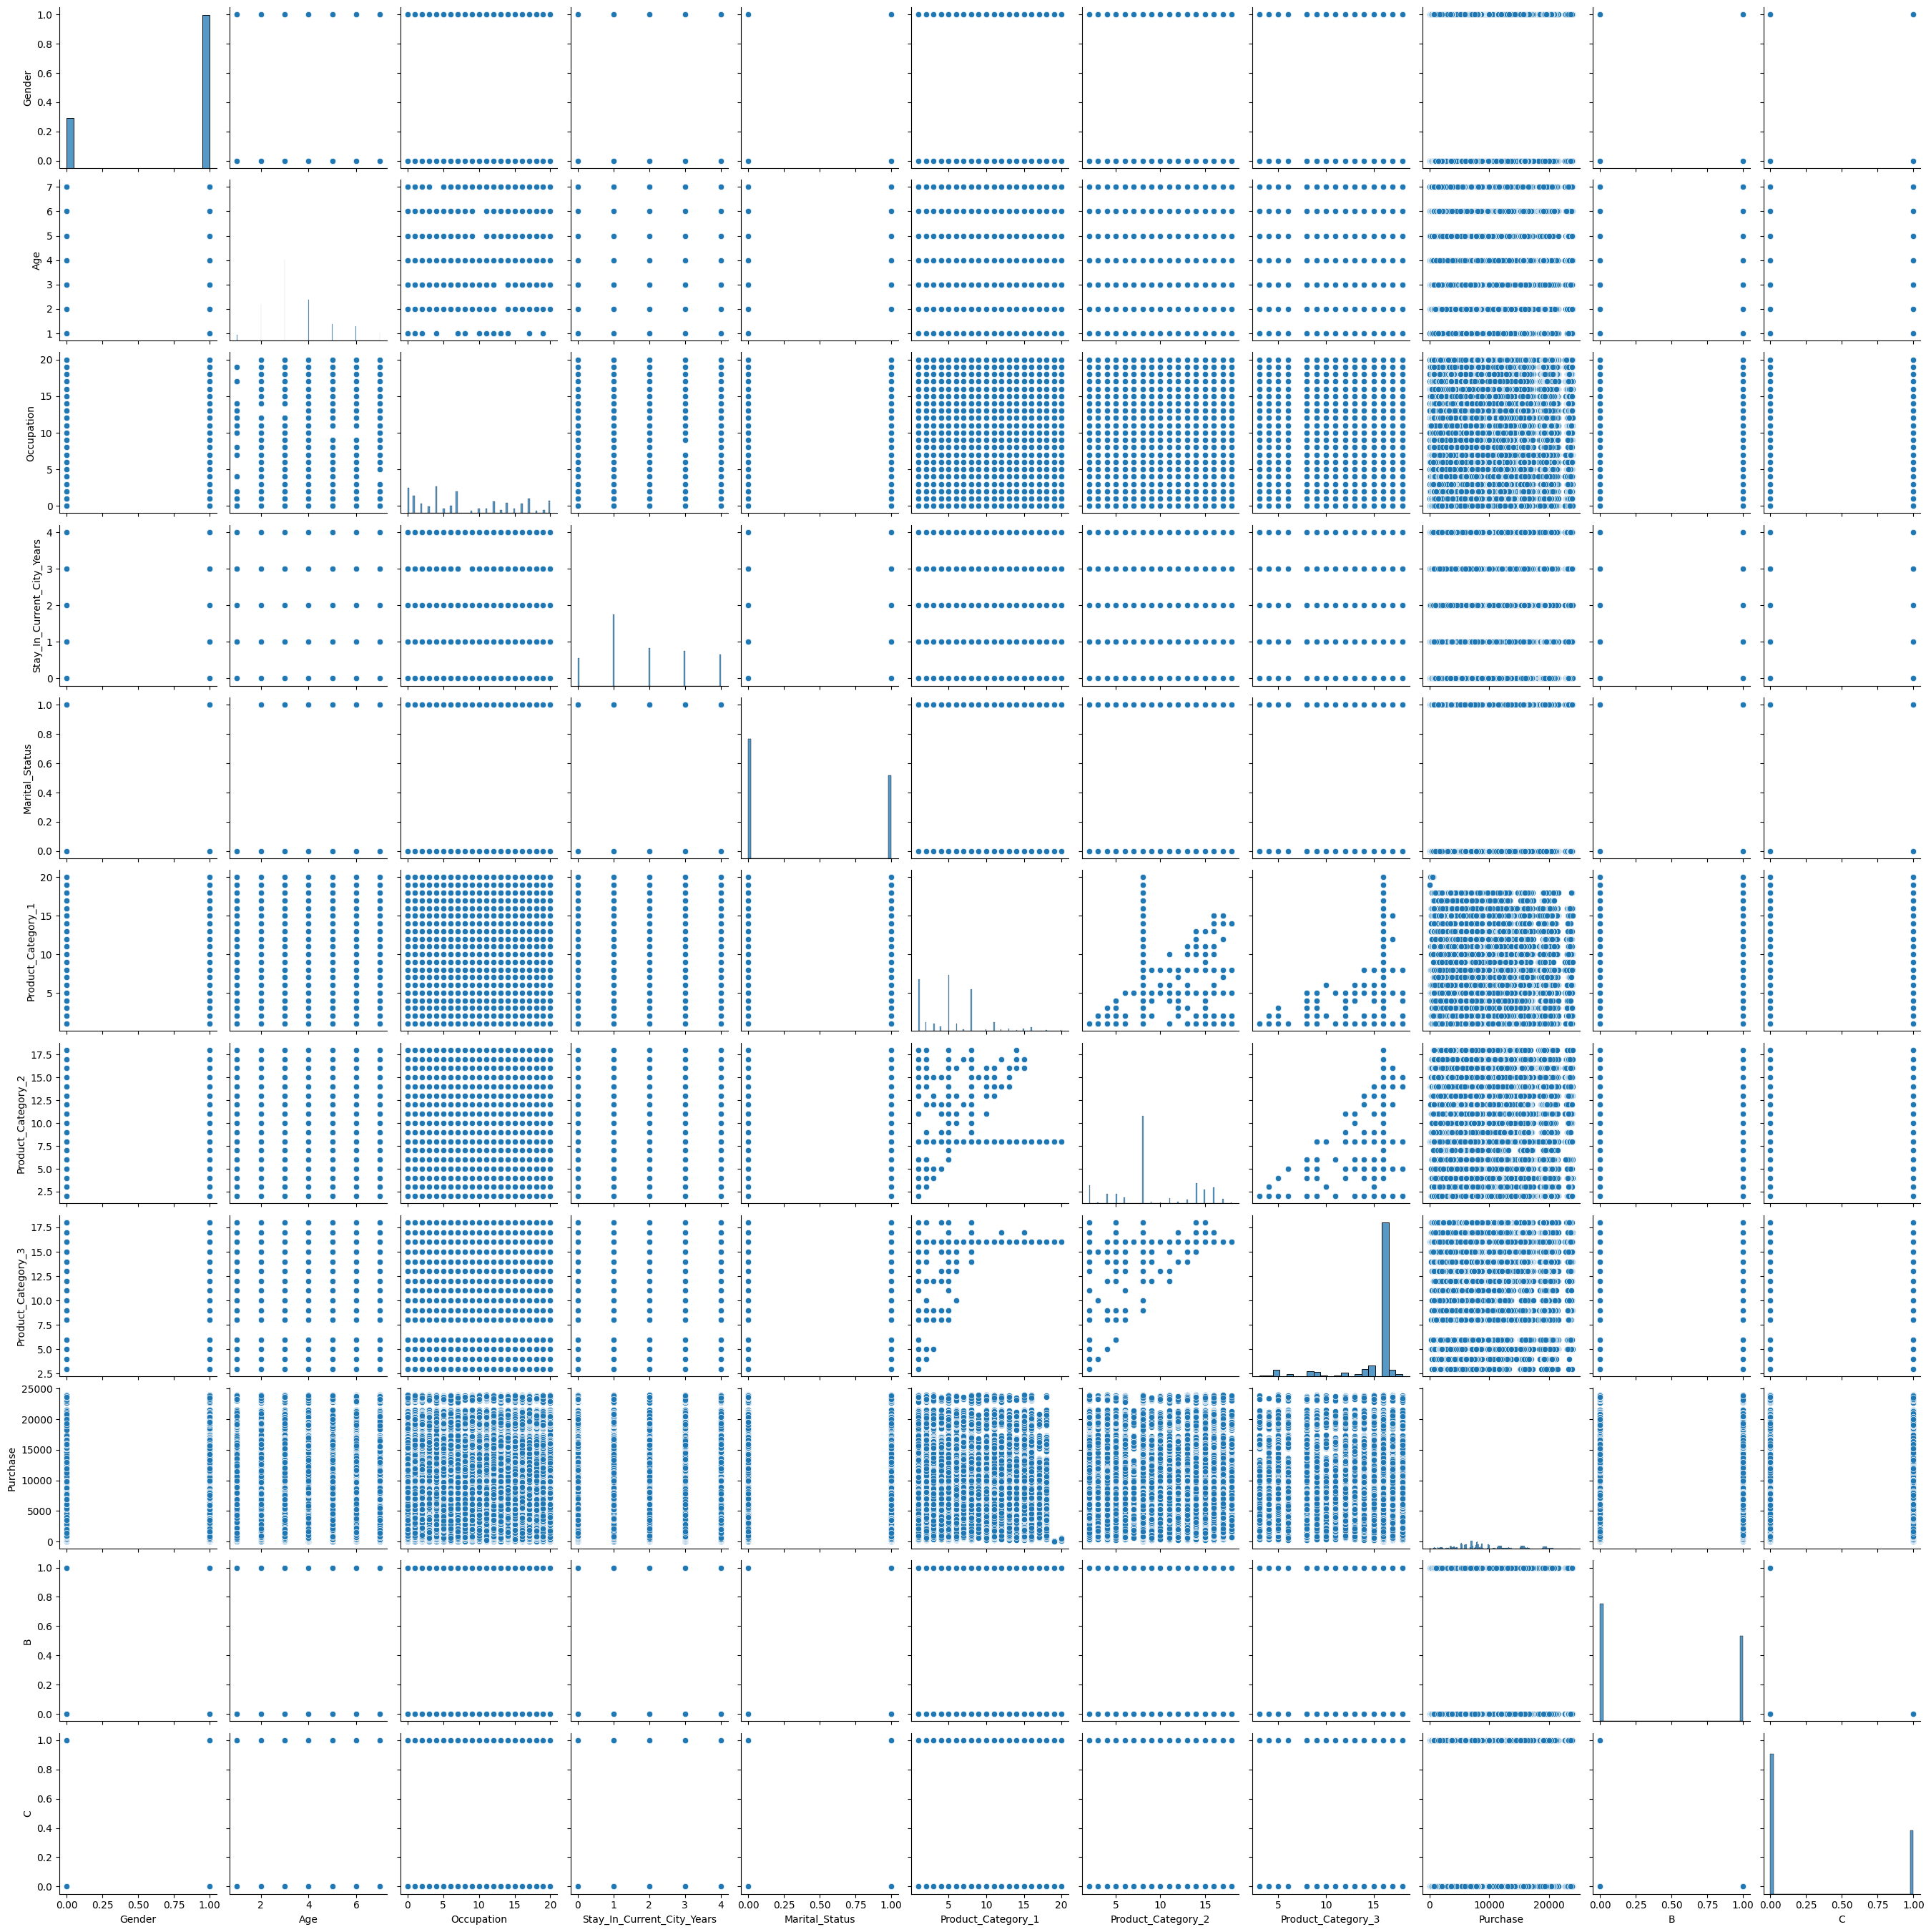

In [150]:
# sns.pairplot(df_total_data)

In [153]:
df_total_data.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

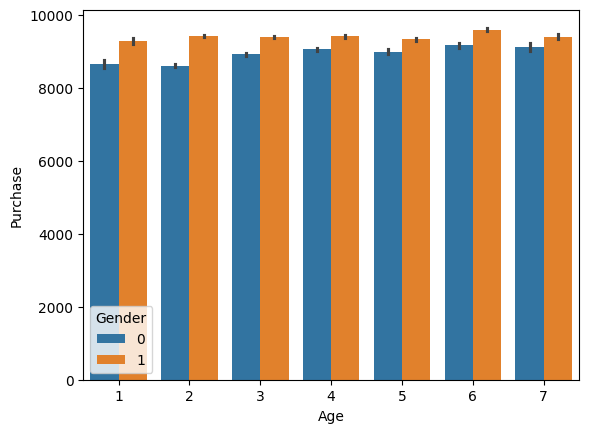

In [154]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df_total_data)

<Axes: xlabel='Occupation', ylabel='Purchase'>

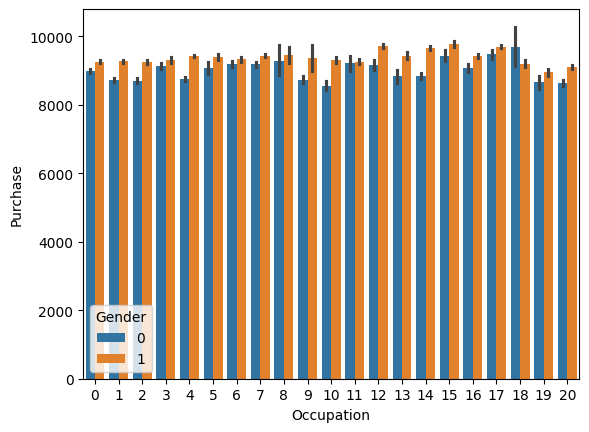

In [156]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df_total_data)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

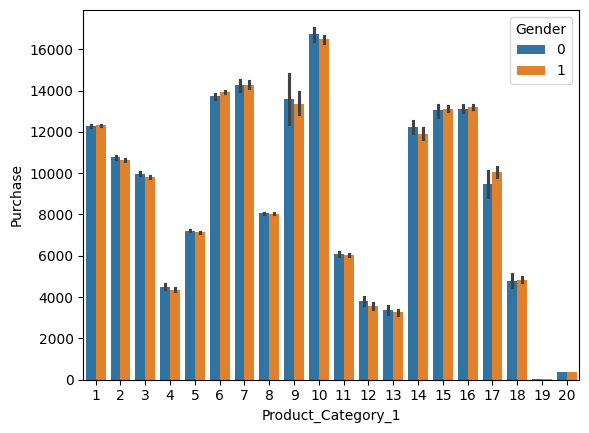

In [157]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df_total_data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

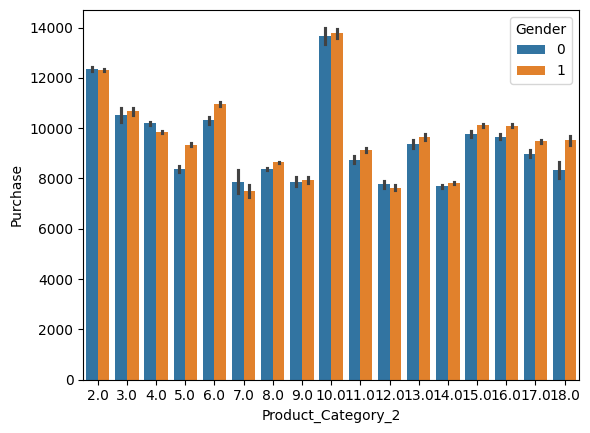

In [158]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df_total_data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

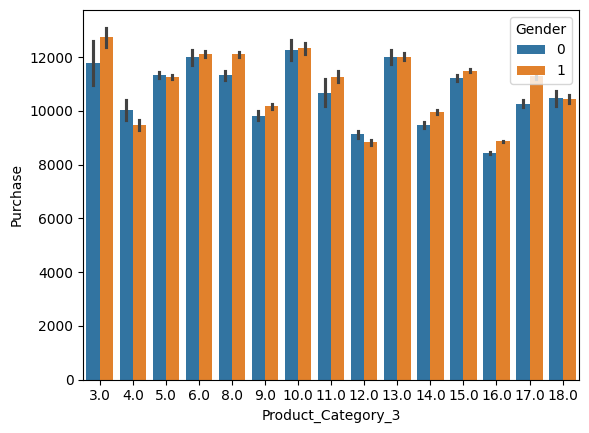

In [159]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df_total_data)

In [198]:
### Feature scaling
df_test=df_total_data[df_total_data['Purchase'].isnull()]

In [199]:
df_test.shape

(233599, 12)

In [200]:
df_train=df_total_data[df_total_data['Purchase'].notnull()]

In [201]:
df_train.shape


(550068, 12)

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [203]:
df_train.drop(['Product_ID'],axis=1,inplace=True)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_27172\1771800074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Product_ID'],axis=1,inplace=True)


In [204]:
df_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [205]:
X=df_train[[col for col in df_train.columns if col!='Purchase']].to_numpy()
y=df_train[['Purchase']].to_numpy()

In [206]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [207]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [217]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

In [218]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune
    },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    # },
    # 'AdaBoost': {
    #     'model': AdaBoostRegressor(random_state=42),
    #     'params': {
    #         'n_estimators': [50, 100, 200],
    #         'learning_rate': [0.01, 0.1, 1.0]
    #     }
    # },
    'GradientBoost': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

In [221]:
cv_folds=5
results={}
for name,config in models.items():
    print(name,config)
    model=config['model']
    params=config['params']

    if params:
        grid_search=GridSearchCV(model,params,cv=cv_folds,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)
        # grid_search=GridSearchCV(model,params,cv=cv_folds,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)
        grid_search.fit(X_train,y_train)
        best_model=grid_search.best_estimator_
        best_score = grid_search.best_score_
    else:
        best_model=model
        best_model.fit(X_train,y_train)
        cv_scores=cross_val_score(model,X_train,y_train,cv=cv_folds,scoring='neg_mean_squared_error')
        best_score = np.mean(cv_scores)
    y_pred=best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    results[name] = {
        'best_model': best_model,
        'cv_neg_mse': best_score,
        'test_mse': test_mse,
        'test_r2': test_r2,
        # 'best_params': getattr(grid_search, 'best_params_', {})
    }
    
    print(f"Best CV neg MSE: {best_score:.4f}")
    print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
    if params:
        print(f"Best params: {getattr(grid_search, 'best_params_', {})}")

LinearRegression {'model': LinearRegression(), 'params': {}}
Best CV neg MSE: -21911379.7459
Test MSE: 21939163.3215, Test R²: 0.1295
Lasso {'model': Lasso(random_state=42), 'params': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best CV neg MSE: -21911379.7461
Test MSE: 21939163.3158, Test R²: 0.1295
Best params: {'alpha': 0.001}
Ridge {'model': Ridge(random_state=42), 'params': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best CV neg MSE: -21911379.7019
Test MSE: 21939160.8080, Test R²: 0.1295
Best params: {'alpha': 10.0}
RandomForest {'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Roshan\Desktop\EDA\eda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best CV neg MSE: -8525888.4258
Test MSE: 8564828.0222, Test R²: 0.6602
Best params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
GradientBoost {'model': GradientBoostingRegressor(random_state=42), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}}
Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 